**Q2**.

Let X be such that $P(X = 2) = P(X = 3) = \frac{1}{10}$  and $P(X = 5) = \frac{8}{10}$.
Plot the cdf F. Use F to find $P(2 < X ≤ 4.8)$ and $P(2 ≤ X ≤ 4.8)$.

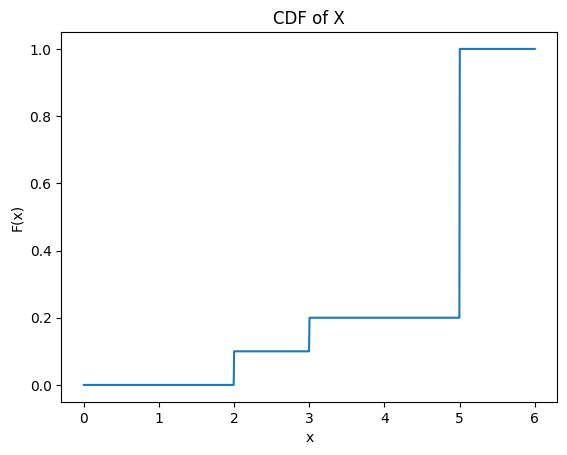

P_2_to_4_8 = 0.1
 P_2_to_4_8_inclusive = 0.2


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def F(x):
    if x < 2:
        return 0
    elif x < 3:
        return 1/10
    elif x < 5:
        return 2/10
    else:
        return 1

x_vals = np.linspace(0, 6, 1000)
y_vals = [F(x) for x in x_vals]

plt.plot(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('CDF of X')
plt.show()
P_2_to_4_8 = F(4.8) - F(2)
P_2_to_4_8_inclusive = F(4.8) - F(2-0.00001)
print(f'P_2_to_4_8 = {P_2_to_4_8}\n P_2_to_4_8_inclusive = {P_2_to_4_8_inclusive}')

**Q13**

Let $X \sim \mathcal{N}(0, 1)$ and let $Y = e^X$.

(a) Find the PDF for $Y$. Plot it.

(b) (Computer Experiment.) Generate a vector $x = (x_1, \ldots, x_{10,000})$ consisting of $10,000$ random standard normals. Let $y = (y_1, \ldots, y_{10,000})$ where $y_i = e^{x_i}$. Draw a histogram of $y$ and compare it to the PDF you found in part (a).

(a) To find the probability density function (PDF) of Y, we can use the change of variables formula for PDFs. The PDF of a standard normal distribution is given by:

$$ f_X(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2} $$

Let $Y = e^X$. Then $X = \ln(Y)$. The derivative is $\frac{dX}{dY} = \frac{1}{Y}$.

The PDF of Y is then given by the absolute value of the derivative of the inverse of Y times the PDF of X evaluated at the inverse of Y:

$$ f_Y(y) = \left| \frac{dX}{dY} \right| f_X(\ln(y)) $$

Substituting the expressions we have:

$$ f_Y(y) = \left| \frac{1}{y} \right| \frac{1}{\sqrt{2\pi}} e^{-(\ln(y))^2/2} $$

Simplifying, we get:

$$ f_Y(y) = \frac{1}{y\sqrt{2\pi}} e^{-\ln^2(y)/2} $$

for $y>0$ and $0$ otherwise. This is the log-normal distribution.





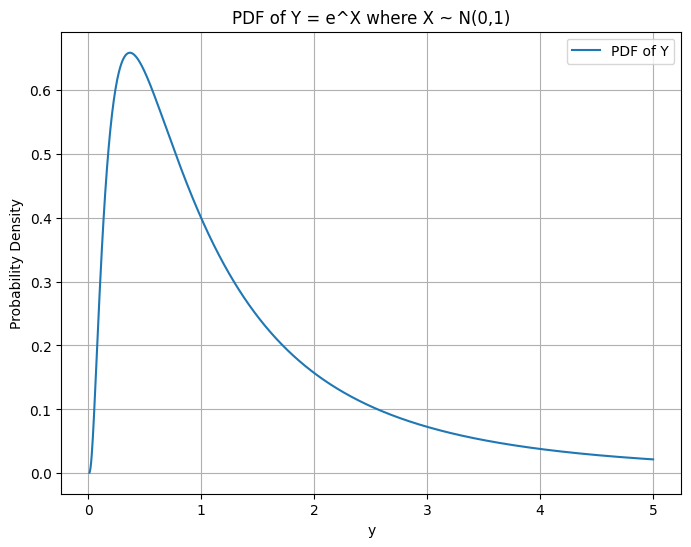

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of y values
y = np.linspace(0.01, 5, 1000) # Start from 0.01 to avoid division by zero in the PDF

# Define the PDF of Y
pdf_Y = (1/(y*np.sqrt(2*np.pi))) * np.exp(-0.5*np.log(y)**2)

# Plot the PDF
plt.figure(figsize=(8,6))
plt.plot(y, pdf_Y, label="PDF of Y")
plt.title("PDF of Y = e^X where X ~ N(0,1)")
plt.xlabel("y")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()


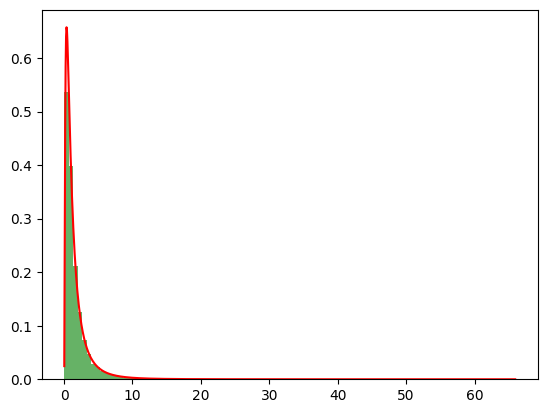

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Generate a vector of 10,000 standard normal random variables
x = np.random.normal(0, 1, 10000)

# Transform the data using the function y = e^x
y = np.exp(x)

# Plot a histogram of y
plt.hist(y, bins=100, density=True, alpha=0.6, color='g')

# Plot the PDF of Y over the range of y
yy = np.linspace(min(y), max(y), 1000)
pdf = (1/(yy*np.sqrt(2*np.pi))) * np.exp(-np.log(yy)**2 / 2)
plt.plot(yy, pdf, 'r')

plt.show()


 ***Q15***
 
 write a program that takes uniform (0, 1) random variables and generates random variables from an Exponential $(\beta)$ distribution.

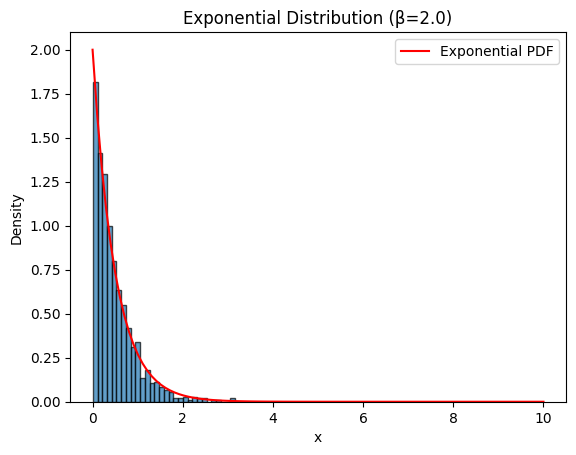

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_transform(uniform_samples, beta):
    return -np.log(1 - uniform_samples) / beta

def generate_exponential_samples(num_samples, beta):
    uniform_samples = np.random.uniform(size=num_samples)
    return exponential_transform(uniform_samples, beta)

# Generate Exponential samples
num_samples = 1000
beta = 2.0
samples = generate_exponential_samples(num_samples, beta)

plt.hist(samples, bins=30, density=True, alpha=0.7, edgecolor='black')

x = np.linspace(0, 10, 100)
y = beta * np.exp(-beta * x)
plt.plot(x, y, color='red', label='Exponential PDF')

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Exponential Distribution (β={})'.format(beta))
plt.legend()
plt.show()


***Q18***

Let $X \sim \mathcal{N}(3, 16)$. Solve the following using the normal table and using a computer package.

(a) Find $P(X < 7)$.

(b) Find $P(X > -2)$.

(c) Find $x$ such that $P(X > x) = 0.05$.

(d) Find $P(0 \leq X < 4)$.

(e) Find $x$ such that $P(|X| > |x|) = 0.05$.

(a) 

Using the normal table:
Standardizing: $Z = \frac{X - \mu}{\sigma} = \frac{7 - 3}{\sqrt{16}} = \frac{4}{4} = 1$

Now, we look up the area to the left of $Z = 1$ in the standard normal table, which is approximately 0.8413. Therefore, $P(X < 7) = 0.8413.$


In [1]:
from scipy.stats import norm

mean = 3
std_dev = 4

probability = norm.cdf(7, loc=mean, scale=std_dev)
print(probability)


0.8413447460685429


(b):

Using the normal table:
Standardizing: $Z = \frac{X - \mu}{\sigma} = \frac{-2 - 3}{\sqrt{16}} = \frac{-5}{4} = -1.25$

Now, we need to find the area to the left of $Z = -1.25$ in the standard normal table, which is approximately 0.1056. Therefore, $P(X > -2) = 1 - 0.1056 = 0.8944$.

In [2]:
probability = 1 - norm.cdf(-2, loc=mean, scale=std_dev)
print(probability)


0.8943502263331446


(c) 

Using the normal table:
We need to find the $Z$-score corresponding to an area of 0.05 to the left of it.
Consulting the standard normal table, we find that $Z = -1.645$ corresponds to an area of 0.05.

Now, we can use the formula to standardize and solve for $X$:

$-1.645 = \frac{X - \mu}{\sigma}$

Substituting the given values:
$-1.645 = \frac{X - 3}{4}$

Solving for $X$, we have:
$X - 3 = -1.645 \cdot 4$
$X - 3 = -6.58$
$X = -6.58 + 3$
$X \approx -3.58$

In [6]:
x = norm.ppf(0.05, loc=mean, scale=std_dev)
print(x)


-3.5794145078058914


(d) 

Using the normal table:
To find the probability $P(0 \leq X < 4)$, we need to calculate the area under the normal curve between the values 0 and 4.

First, let's standardize the values using the mean and standard deviation:
For $X = 0$: $Z_1 = \frac{0 - 3}{4} = -0.75$
For $X = 4$: $Z_2 = \frac{4 - 3}{4} = 0.25$

Now, we look up the areas to the left of $Z_1$ and $Z_2$ in the standard normal table.
The area to the left of $Z_1 = -0.75$ is approximately 0.2266, and the area to the left of $Z_2 = 0.25$ is approximately 0.5987.

Therefore, $P(0 \leq X < 4) = 0.5987 - 0.2266 = 0.3721$.

In [7]:
probability = norm.cdf(4, loc=mean, scale=std_dev) - norm.cdf(0, loc=mean, scale=std_dev)
print(probability)


0.3720789733060555


(e) 

Using the normal table:
We want to find the value of $x$ such that the probability of $|X|$ being greater than $|x|$ is 0.05.

Since the normal distribution is symmetric, we can rewrite the probability as:

$P(X > x) + P(X < -x) = 0.05$

Using the symmetry property, $P(X < -x) = P(X > x)$. Therefore:

$2 \cdot P(X > x) = 0.05$

$P(X > x) = 0.025$

Now, we need to find the $Z$-score corresponding to an area of 0.025 to the left of it.

Consulting the standard normal table, we find that $Z = -1.96$ corresponds to an area of 0.025.

Now, we can use the formula to standardize and solve for $X$:

$-1.96 = \frac{x - \mu}{\sigma}$

Substituting the given values:
$-1.96 = \frac{x - 3}{4}$

Solving for $x$, we have:
$x - 3 = -1.96 \cdot 4$
$x - 3 = -7.84$
$x = -7.84 + 3$
$x \approx -4.84$

Therefore, $x \approx -4.84$.

In [8]:
x = norm.ppf(0.025, loc=mean, scale=std_dev)
print(x)


-4.839855938160218
